In [13]:
%cd ..
import numpy as np
import xarray as xr

from datetime import datetime
from dateutil.relativedelta import relativedelta

from app.routers.weather.api_models import OutputUnit
from app.routers.weather.controller import WeatherController

%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

C:\Users\AL21652\Desktop\Py Projects


In [14]:
# This usage of a __main__ clause isn't necessary, but illustrates regular implementation of the controller nicely
if __name__ == '__main__':
    coords = [[(51.873419, 5.705929), (51.873419, 5.71), (51.88, 5.71)],
          [(52.121976, 4.782497)],
          [(52.424793, 4.776927)]]
    weather_controller = WeatherController()

2021-02-11 08:52.31 [debug    ] Weather model [uurgegevens] initialized successfully datetime=datetime.datetime(2021, 2, 11, 7, 52, 31, 89749)
2021-02-11 08:52.31 [debug    ] Weather model [daggegevens] initialized successfully datetime=datetime.datetime(2021, 2, 11, 7, 52, 31, 89749)
2021-02-11 08:52.31 [debug    ] Initializing weather model [arome] datetime=datetime.datetime(2021, 2, 11, 7, 52, 31, 89749)
2021-02-11 08:52.31 [debug    ] Weather model [arome] initialized successfully datetime=datetime.datetime(2021, 2, 11, 7, 52, 31, 89749)
2021-02-11 08:52.31 [debug    ] Initializing weather model [pluim] datetime=datetime.datetime(2021, 2, 11, 7, 52, 31, 89749)
2021-02-11 08:52.31 [debug    ] Weather model [pluim] initialized successfully datetime=datetime.datetime(2021, 2, 11, 7, 52, 31, 89749)
2021-02-11 08:52.31 [debug    ] Initializing weather model [era5sl] datetime=datetime.datetime(2021, 2, 11, 7, 52, 31, 89749)
2021-02-11 08:52.31 [debug    ] Initializing CSD ERA5 Single Lev

# (KNMI Daggegevens) Historical data (per day) - all weather factors in human-readable name/unit

In [15]:
ds_hist_day: xr.Dataset = weather_controller.get_weather(
    source_id="knmi",
    model_id="daggegevens",
    fetch_async=False,
    coords=coords,
    begin=datetime(year=2018, month=1, day=1),
    end=datetime(year=2018, month=1, day=31),
    factors=None
)

ds_hist_day = weather_controller.convert_names_and_units(
        'knmi', 'daggegevens', False, ds_hist_day, OutputUnit.human
    )
print(ds_hist_day)

<xarray.Dataset>
Dimensions:                                       (lat: 3, lon: 3, time: 31)
Coordinates:
  * time                                          (time) datetime64[ns] 2018-...
  * lat                                           (lat) float64 51.88 ... 52.42
  * lon                                           (lon) float64 4.777 ... 5.709
Data variables:
    wind_direction                                (time, lat, lon) float64 na...
    FHVEC                                         (time, lat, lon) float64 na...
    wind_speed                                    (time, lat, lon) float64 na...
    wind_speed_max                                (time, lat, lon) float64 na...
    wind_speed_max_hour                           (time, lat, lon) float64 na...
    wind_speed_min                                (time, lat, lon) float64 na...
    wind_speed_min_hour                           (time, lat, lon) float64 na...
    wind_gust_max                                 (time, lat, lon) fl

C:\Users\AL21652\Miniconda3\envs\weather_provider_api\lib\site-packages\xarray\core\computation.py:724: RuntimeWarning: invalid value encountered in ? (vectorized)
  result_data = func(*input_data)


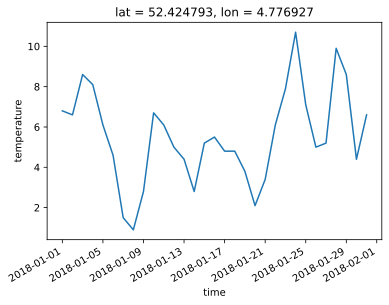

In [16]:
ds_var_hist_day = ds_hist_day.sel(lat=52.424793, lon=4.776927)
ds_var_hist_day['temperature'].plot()

# (KNMI Daggegevens) Historical data (per day) - only weather factors related to temperature in original name/unit

In [17]:
ds_hist_day_temp: xr.Dataset = weather_controller.get_weather(
    source_id="knmi",
    model_id="daggegevens",
    fetch_async=False,
    coords=coords,
    begin=datetime(year=2018, month=1, day=1),
    end=datetime(year=2018, month=1, day=31),
    factors=['TEMP']
)

ds_hist_day_temp = weather_controller.convert_names_and_units(
        'knmi', 'daggegevens', False, ds_hist_day_temp, OutputUnit.si
    )
print(ds_hist_day_temp)

<xarray.Dataset>
Dimensions:                                       (lat: 3, lon: 3, time: 31)
Coordinates:
  * time                                          (time) datetime64[ns] 2018-...
  * lat                                           (lat) float64 51.88 ... 52.42
  * lon                                           (lon) float64 4.777 ... 5.709
Data variables:
    wind_direction                                (time, lat, lon) float64 na...
    FHVEC                                         (time, lat, lon) float64 na...
    wind_speed                                    (time, lat, lon) float64 na...
    wind_speed_max                                (time, lat, lon) float64 na...
    wind_speed_max_hour                           (time, lat, lon) float64 na...
    wind_speed_min                                (time, lat, lon) float64 na...
    wind_speed_min_hour                           (time, lat, lon) float64 na...
    wind_gust_max                                 (time, lat, lon) fl

C:\Users\AL21652\Miniconda3\envs\weather_provider_api\lib\site-packages\xarray\core\computation.py:724: RuntimeWarning: invalid value encountered in ? (vectorized)
  result_data = func(*input_data)


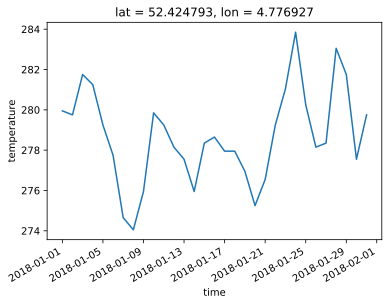

In [18]:
ds_var_hist_day_temp = ds_hist_day_temp.sel(lat=52.424793, lon=4.776927)
ds_var_hist_day_temp['temperature'].plot()

# (KNMI Uurgegevens) Historical data (per hour) - all weather factors in International System of Units (SI)

In [19]:
ds_hist_hour: xr.Dataset = weather_controller.get_weather(
    source_id="knmi",
    model_id="uurgegevens",
    fetch_async=False,
    coords=coords,
    begin=datetime(year=2019, month=10, day=14),
    end=datetime(year=2019, month=10, day=16),
    factors=None
)

ds_hist_hour = weather_controller.convert_names_and_units(
        'knmi', 'uurgegevens', False, ds_hist_hour, OutputUnit.si
    )
print(ds_hist_hour)

<xarray.Dataset>
Dimensions:                 (lat: 3, lon: 3, time: 49)
Coordinates:
  * time                    (time) datetime64[ns] 2019-10-14 ... 2019-10-16
  * lat                     (lat) float64 51.88 52.12 52.42
  * lon                     (lon) float64 4.777 4.782 5.709
Data variables:
    DD                      (time, lat, lon) float64 nan nan 230.0 ... nan nan
    wind_speed              (time, lat, lon) float64 nan nan 3.0 ... 4.0 nan nan
    FF                      (time, lat, lon) float64 nan nan 3.0 ... 3.0 nan nan
    wind_speed_max          (time, lat, lon) float64 nan nan 5.0 ... 6.0 nan nan
    temperature             (time, lat, lon) float64 nan nan 286.3 ... nan nan
    temperature_min_10cm    (time, lat, lon) float64 nan nan nan ... nan nan nan
    TD                      (time, lat, lon) float64 nan nan 285.8 ... nan nan
    sunlight_duration       (time, lat, lon) float64 nan nan 0.0 ... 0.0 nan nan
    global_radiation        (time, lat, lon) float64 nan nan 

C:\Users\AL21652\Miniconda3\envs\weather_provider_api\lib\site-packages\xarray\core\computation.py:724: RuntimeWarning: invalid value encountered in ? (vectorized)
  result_data = func(*input_data)


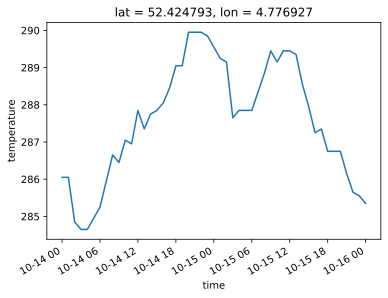

In [20]:
ds_var_hist_hour = ds_hist_hour.sel(lat=52.424793, lon=4.776927)
ds_var_hist_hour['temperature'].plot()

# (KNMI Harmonie Arome) Prediction 48 hours (per hour) - all weather factors in original name/unit

In [21]:
# Harmonie Arome requires repository with files matching the requested period if you want proper output
ds_pred_48h: xr.Dataset = weather_controller.get_weather(
    source_id="knmi",
    model_id="arome",
    fetch_async=False,
    coords=coords,
    begin=(datetime.today() - relativedelta(days=1)).replace(hour=0, minute=0, second=0),
    end=(datetime.today() + relativedelta(days=1)),
    factors=None
)

ds_pred_48h = weather_controller.convert_names_and_units(
        'knmi', 'arome', False, ds_pred_48h, OutputUnit.original
    )
print(ds_pred_48h)

2021-02-11 08:52.37 [debug    ] Initialized KNMI Harmonie (Arome) repository datetime=datetime.datetime(2021, 2, 11, 7, 52, 37, 877953)
2021-02-11 08:52.37 [debug    ] Verifying existing files for KNMI Harmonie (Arome) in [C:\Temp\Weather_Repository\AROME] datetime=datetime.datetime(2021, 2, 11, 7, 52, 37, 883959)
2021-02-11 08:52.37 [debug    ] Gathering repository data for the period of 2021-02-10 00:00:00.877953 to 2021-02-11 07:52:37.877953 datetime=datetime.datetime(2021, 2, 11, 7, 52, 37, 883959)
2021-02-11 08:52.37 [debug    ] Checking files in [C:\Temp\Weather_Repository\AROME]
2021-02-10 00:00:00.877953 2021-02-11 07:52:37.877953
BEGIN, END == 2021-02-10 00:00:00.877953 2021-02-11 07:52:37.877953
<xarray.Dataset>
Dimensions:                                  (lat: 2, lon: 1, prediction_moment: 1, time: 49)
Coordinates:
  * lat                                      (lat) float64 52.13 52.43
  * lon                                      (lon) float64 4.773
  * time                 

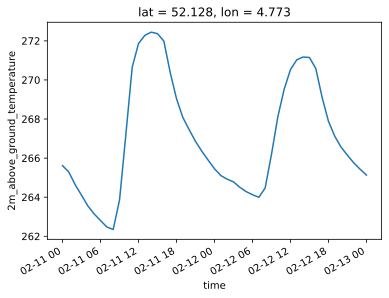

In [22]:
# The results are rounded to the KNMI grid
ds_pred_48h = ds_pred_48h.sel(lat=52.128, lon=4.773)
ds_pred_48h['2m_above_ground_temperature'].plot()

# (KNMI Pluim) Prediction 15 days (per 12 hours) - all weather factors in original name/unit

In [23]:
print(coords)
ds_pred_15d: xr.Dataset = weather_controller.get_weather(
    source_id="knmi",
    model_id="pluim",
    fetch_async=False,
    coords=coords,
    begin=(datetime.today() - relativedelta(days=1)).replace(hour=0, minute=0, second=0, microsecond=0),
    end=(datetime.today() + relativedelta(days=12)).replace(hour=0, minute=0, second=0, microsecond=0),
    factors=None
)
ds_pred_15d = weather_controller.convert_names_and_units(
        'knmi', 'pluim', False, ds_pred_15d, OutputUnit.original
    )
print(ds_pred_15d)

[[(51.873419, 5.705929), (51.873419, 5.71), (51.88, 5.71)], [(52.121976, 4.782497)], [(52.424793, 4.776927)]]
<xarray.Dataset>
Dimensions:                (lat: 3, lon: 3, time: 47)
Coordinates:
  * time                   (time) datetime64[ns] 2021-02-11T12:00:00 ... 2021...
  * lat                    (lat) float64 51.88 52.12 52.42
  * lon                    (lon) float64 4.777 4.782 5.709
Data variables:
    wind_speed             (time, lat, lon) float64 nan nan 7.2 ... nan nan
    wind_direction         (time, lat, lon) float64 nan nan 100.0 ... nan nan
    short_time_wind_speed  (time, lat, lon) float64 nan nan 17.28 ... nan nan
    temperature            (time, lat, lon) float64 nan nan -2.3 ... 0.4 nan nan
    precipitation          (time, lat, lon) float64 nan nan 0.0 ... 0.0 nan nan
    precipitation_sum      (time, lat, lon) float64 nan nan 0.1 ... 6.6 nan nan
    cape                   (time, lat, lon) float64 nan nan 0.0 ... 0.0 nan nan


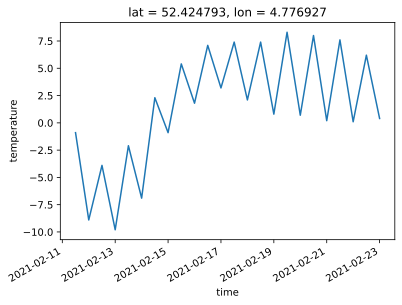

In [24]:
ds_pred_15d = ds_pred_15d.sel(lat=52.424793, lon=4.776927)
ds_pred_15d = ds_pred_15d.dropna("time")  # Dropping Time NaN values to make the plot work
ds_pred_15d['temperature'].plot()

# (KNMI Actuele Waarnemingen) 

In [25]:
ds_current: xr.Dataset = weather_controller.get_weather(
    source_id="knmi",
    model_id="pluim",
    fetch_async=False,
    coords=coords,
    begin=(datetime.today() - relativedelta(days=1)).replace(hour=0, minute=0, second=0),
    end=(datetime.today() + relativedelta(days=12)),
    factors=None
)

ds_current = weather_controller.convert_names_and_units(
        'knmi', 'pluim', False, ds_current, OutputUnit.human
    )
print(ds_current)

<xarray.Dataset>
Dimensions:            (lat: 3, lon: 3, time: 48)
Coordinates:
  * time               (time) datetime64[ns] 2021-02-11T12:00:00 ... 2021-02-...
  * lat                (lat) float64 51.88 52.12 52.42
  * lon                (lon) float64 4.777 4.782 5.709
Data variables:
    wind_speed         (time, lat, lon) float64 nan nan 2.0 nan ... 4.4 nan nan
    wind_direction     (time, lat, lon) float64 nan nan 100.0 ... 90.0 nan nan
    wind_speed_max     (time, lat, lon) float64 nan nan 4.8 nan ... 7.8 nan nan
    temperature        (time, lat, lon) float64 nan nan -2.3 nan ... nan nan nan
    precipitation      (time, lat, lon) float64 nan nan 0.0 nan ... 0.0 nan nan
    precipitation_sum  (time, lat, lon) float64 nan nan 0.1 nan ... 6.7 nan nan
    cape               (time, lat, lon) float64 nan nan 0.0 nan ... 0.0 nan nan


_**There is no plot for the current weather data, as the data only consists of a single measurement per factor.**_

# (CDS ERA5 Single Levels) Hourly data on single levels from 1979 to present - all weather factors in International System of Units (SI)

In [26]:
# CDS ERA5 SL requires a repository with files matching the requested period if you want proper output
ds_hist_1979: xr.Dataset = weather_controller.get_weather(
    source_id="cds",
    model_id="era5sl",
    fetch_async=False,
    coords=coords,
    begin=datetime(year=2019, month=10, day=14),
    end=datetime(year=2019, month=10, day=16),
    factors=None
)

ds_hist_1979 = weather_controller.convert_names_and_units(
        'cds', 'era5sl', False, ds_hist_1979, OutputUnit.original
    )
print(ds_hist_1979)

2021-02-11 08:53.02 [debug    ] Verifying existing files for CSD ERA5 Single Levels in [C:\Temp\Weather_Repository\ERA5_SL] datetime=datetime.datetime(2021, 2, 11, 7, 53, 2, 344656)
2021-02-11 08:53.02 [debug    ] File [C:\Temp\Weather_Repository\ERA5_SL\ERA5SL_2020_12_UNFORMATTED.nc] is not a permanent file for CSD ERA5 Single Levels and needs to be deleted
2021-02-11 08:53.02 [debug    ] Safely deleting file [C:\Temp\Weather_Repository\ERA5_SL\ERA5SL_2020_12_UNFORMATTED.nc] datetime=datetime.datetime(2021, 2, 11, 7, 53, 2, 344656)
2021-02-11 08:53.02 [debug    ] Gathering repository data for the period of 2019-10-14 00:00:00 to 2019-10-16 00:00:00 datetime=datetime.datetime(2021, 2, 11, 7, 53, 2, 344656)
2021-02-11 08:53.02 [debug    ] Verifying existing files for CSD ERA5 Single Levels in [C:\Temp\Weather_Repository\ERA5_SL] datetime=datetime.datetime(2021, 2, 11, 7, 53, 2, 344656)
2021-02-11 08:53.02 [debug    ] Verifying existing files for CSD ERA5 Single Levels in [C:\Temp\Weathe

FileNotFoundError: The repository did not contain any files for the period of 2019-10-14 00:00:00 to 2019-10-16 00:00:00. The active repository period for CSD ERA5 Single Levels is [2018-02-01 00:00:00 - 2021-02-06 00:00:00], and its currently oldest gathered file is labeled as [2020_10]. 

In [ ]:
# Coordinates have been rounded to the nearest CDS ERA5SL grid point
ds_hist_1979 = ds_hist_1979.sel(lat=52.5, lon=4.75)
ds_hist_1979['2m_temperature'].plot()

# (EXTRA - CDS ERA5 Single Levels) The same requeste as above, but using the model itself, instead of the controller

In [ ]:
# Changes to the setup:
# The Weather Controller is no longer needed, and in in stead the wanted model is imported.
from app.routers.weather.sources.cds.models.era5sl import ERA5SLModel
from app.routers.weather.utils.geo_position import GeoPosition
from app.routers.weather.api_models import OutputUnit

era5sl = ERA5SLModel()

# Because the model itself takes a list of GeoPosition coordinates, in stead of a list of lists of tuples, we have to either convert the existing list to 2D:
coords_2d = [
            GeoPosition(
                float(np.mean([single_point[0] for single_point in single_polygon])),
                float(np.mean([single_point[1] for single_point in single_polygon])),
            )
            for single_polygon in coords
        ]
# Or just input it directly as 2D:
coords = [GeoPosition(51.875613, 5.708643),
          GeoPosition(52.121976, 4.782497),
          GeoPosition(52.424793, 4.776927)]

In [ ]:
# CDS ERA5 SL requires a repository with files matching the requested period if you want proper output
ds_hist_1979: xr.Dataset = era5sl.get_weather(
    coords=coords_2d,
    begin=datetime(year=2019, month=10, day=14),
    end=datetime(year=2019, month=10, day=16),
    weather_factors=None
)

print(ds_hist_1979)

In [ ]:
# Coordinates have been rounded to the nearest CDS ERA5SL grid point
ds_hist_1979 = ds_hist_1979.sel(lat=52.5, lon=4.75)
ds_hist_1979['2m_temperature'].plot()

In [ ]:
# Unit conversion also works differently if using the model itself:
ds_hist_1979 = era5sl.convert_names_and_units(ds_hist_1979, OutputUnit.human)
ds_hist_1979['2m_temperature'].plot()